In [140]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [141]:
def load_dataset(filename):
    data = read_csv(filename, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:, -1]
    X = X.astype(str)
    return X, y

In [142]:
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [143]:
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [144]:
# Chi-Squared Feature Selection  score_func=chi2
# Mutual Information Feature Selection   score_func=mutual_info_classif
def select_features(X_train, y_train, X_test, score_func, k):
    fs = SelectKBest(score_func=score_func, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [145]:
X, y = load_dataset('breast-cancer.csv')

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [147]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [148]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
# Chi-Squared Feature Selection  score_func=chi2

In [149]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, score_func=chi2, k='all')

In [150]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.472553
Feature 1: 0.029193
Feature 2: 2.137658
Feature 3: 29.381059
Feature 4: 8.222601
Feature 5: 8.100183
Feature 6: 1.273822
Feature 7: 0.950682
Feature 8: 3.699989


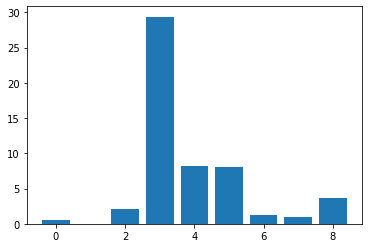

In [151]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# Mutual Information Feature Selection   score_func=mutual_info_classif

In [152]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, score_func=mutual_info_classif, k='all')

In [153]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.022789
Feature 1: 0.000000
Feature 2: 0.046008
Feature 3: 0.003501
Feature 4: 0.042808
Feature 5: 0.060281
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


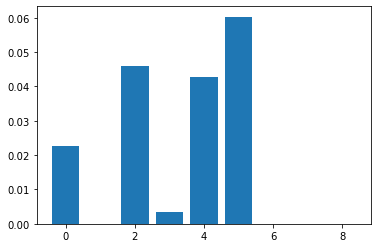

In [154]:
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()